In [2]:
import sys
import os
os.environ['PROJ_DATA'] = "/pscratch/sd/p/plutzner/proj_data"
import xarray as xr
import torch
import torchinfo
import random
import numpy as np
import importlib as imp
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import cartopy.crs as ccrs
import json
import pickle
import gzip
import torch
# import shash
from shash.shash_torch import Shash
#import matplotlib.colors as mcolorsxx|

%load_ext autoreload
%autoreload 2
import utils
import utils.filemethods as filemethods
import databuilder.data_loader as data_loader
from databuilder.data_generator import multi_input_data_organizer
from databuilder.data_generator import ClimateData
import databuilder.data_generator as data_generator
import analysis.analysis_metrics as analysis_metrics

print(f"python version = {sys.version}")
print(f"numpy version = {np.__version__}")
print(f"xarray version = {xr.__version__}")
print(f"pytorch version = {torch.__version__}")

# https://github.com/victoresque/pytorch-template/tree/master

python version = 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:08:06) [GCC 11.3.0]
numpy version = 1.26.4
xarray version = 2024.5.0
pytorch version = 2.0.0.post104


In [4]:
exp009_data = xr.open_dataset("/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp009_d_train_1850-1900.nc")

In [5]:
exp009_data["x"].values.shape

(18615, 180, 360, 2)

In [9]:
train_ds = xr.open_dataset("/Users/C830793391/BIG_DATA/E3SM_Data/ens1/input_vars.v2.LR.historical_0101.eam.h1.1850-2014.nc")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/C830793391/BIG_DATA/E3SM_Data/ens1/input_vars.v2.LR.historical_0101.eam.h1.1850-2014.nc'

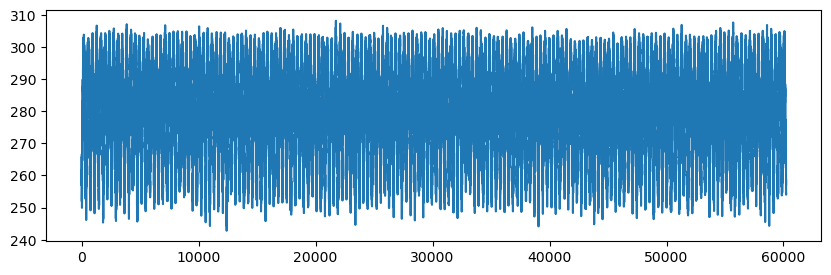

In [7]:
temp = train_ds['TS'].sel(lat = 40, lon = 105, method = 'nearest')
plt.figure(figsize=(10, 3))
plt.plot(temp)

In [ ]:
prect = train_ds["PRECT"]
prect.values * 10e3 * 86400ç

In [10]:
#examp = xr.open_dataset("/Users/C830793391/BIG_DATA/E3SM_Data/ens1/v2.LR.historical_0101.eam.h0.1850-01.nc")
examp = xr.open_dataset("/pscratch/sd/q/qinyi/E3SMv2_init/v2.LR.historical_0101/archive/atm/hist/v2.LR.historical_0101.eam.h0.1850-01.nc")

In [11]:
examp.info

<bound method Dataset.info of <xarray.Dataset> Size: 445MB
Dimensions:              (ncol: 21600, lev: 72, ilev: 73, cosp_prs: 7, nbnd: 2,
                          cosp_tau: 7, cosp_scol: 10, cosp_ht: 40, cosp_sr: 15,
                          cosp_sza: 5, cosp_htmisr: 16, cosp_tau_modis: 7,
                          cosp_reffice: 6, cosp_reffliq: 6, time: 1)
Coordinates: (12/13)
  * lev                  (lev) float64 576B 0.1238 0.1828 0.2699 ... 993.8 998.5
  * ilev                 (ilev) float64 584B 0.1 0.1477 0.218 ... 997.0 1e+03
  * cosp_prs             (cosp_prs) float64 56B 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_tau             (cosp_tau) float64 56B 0.15 0.8 2.45 ... 41.5 100.0
  * cosp_scol            (cosp_scol) int32 40B 1 2 3 4 5 6 7 8 9 10
  * cosp_ht              (cosp_ht) float64 320B 1.896e+04 1.848e+04 ... 240.0
    ...                   ...
  * cosp_sza             (cosp_sza) float64 40B 0.0 20.0 40.0 60.0 80.0
  * cosp_htmisr          (cosp_htmisr) float64 128B

0.04919420158833298
Total area under the histogram: 1.0


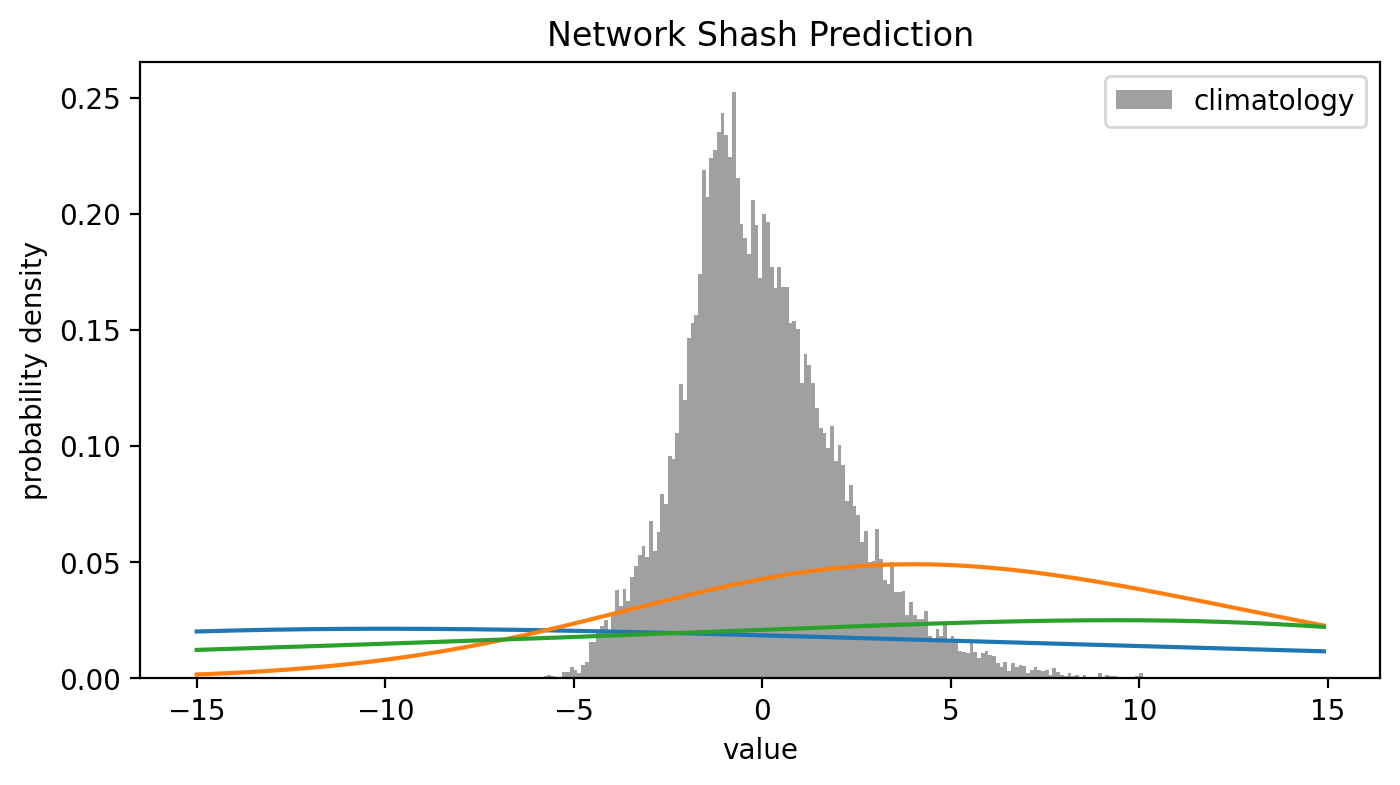

In [3]:
import shash.shash_torch
from shash.shash_torch import Shash
# imp.reload(shash.shash_torch)

output = np.array([[-10.8269005 ,  18.552628  ,   0.39592332,   1. ], 
                  [4 , 8.10926   ,  0.10827847,  1.], 
                  [10.787776  , 15.680301  , -0.539243  ,  1. ]])

climate_data = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp009_d_train_1850-1900.nc'

data = xr.open_dataset(climate_data)
climatology = data["y"]

# bins_inc = 0.025
# bins = np.arange(-10, 10, bins_inc)

plt.figure(figsize=(8, 4), dpi=200)

x = np.arange(-15, 15, 0.1)
dist = Shash(output)
p = dist.prob(x).numpy()

print(np.max(p[:,1]))

counts, bin_edges, __ = plt.hist(
    climatology, x, density=True, color="gray", alpha=0.75, label="climatology"
)
bin_widths = np.diff(bin_edges)
area = np.sum(counts * bin_widths)
print(f'Total area under the histogram: {area}')

plt.plot(x, p)
plt.xlabel("value")
plt.ylabel("probability density")
plt.title("Network Shash Prediction")
plt.legend()
plt.show()

In [5]:
outputfn = '/Users/C830793391/Documents/Research/E3SM/saved/outputexp009_output_testset.pkl'
with gzip.open(outputfn, "rb") as obj1:
    exp009_output = pickle.load(obj1)
obj1.close()

exp009_output

array([[-0.39203796,  0.8136969 ,  0.28605786,  0.9136358 ],
       [-0.38987544,  0.80490255,  0.31450263,  0.9297025 ],
       [-0.33746892,  0.8091832 ,  0.27418852,  0.93337077],
       ...,
       [-0.3757702 ,  0.7669527 ,  0.3665465 ,  0.9262008 ],
       [-0.35496956,  0.8295147 ,  0.37278405,  0.92988217],
       [-0.37548095,  0.8812224 ,  0.38000873,  0.92935   ]],
      dtype=float32)

In [ ]:
from shash.shash_torch import Shash
# params = np.zeros((2,4))
# # mu = 0; sigma=1., gamma=0, tau=1
# params[:,1] = 1.
# params[:,-1] = .003
# s = Shash(params)
s = Shash(output)

x = np.arange(-20,100,.1)
y = s.prob(x)
np.shape(y)

for i in (1000, 300, 10, 40):
    plt.plot(x, y[:,i])

In [ ]:
test_ds = xr.open_dataset("/Users/C830793391/BIG_DATA/E3SM_Data/ens3/input_vars.v2.LR.historical_0201.eam.h1.1850-2014.nc")


In [ ]:
PRECT_m_s = test_ds.PRECT[30000:40000]

mm/day <xarray.DataArray 'PRECT' (time: 10000, lat: 180, lon: 360)> Size: 3GB
array([[[3.9205301e-01, 3.9207911e-01, 3.9211363e-01, ...,
         3.9202607e-01, 3.9202654e-01, 3.9203542e-01],
        [4.5706582e-01, 4.5807940e-01, 4.5908427e-01, ...,
         4.5399231e-01, 4.5502031e-01, 4.5604545e-01],
        [4.3636036e-01, 4.3956658e-01, 4.4286770e-01, ...,
         4.2731255e-01, 4.3023324e-01, 4.3324926e-01],
        ...,
        [4.9745071e-01, 5.1310223e-01, 5.2896857e-01, ...,
         4.5147157e-01, 4.6666664e-01, 4.8198265e-01],
        [3.2904327e-01, 3.3572435e-01, 3.4225571e-01, ...,
         3.0821007e-01, 3.1527522e-01, 3.2222325e-01],
        [1.6787815e-01, 1.6898030e-01, 1.7005144e-01, ...,
         1.6439775e-01, 1.6558550e-01, 1.6674611e-01]],

       [[6.5092035e-02, 6.4610936e-02, 6.4133942e-02, ...,
         6.6555686e-02, 6.6064857e-02, 6.5576822e-02],
        [6.4371131e-02, 6.3598573e-02, 6.2833756e-02, ...,
         6.6740930e-02, 6.5941751e-02, 6.5152004e-

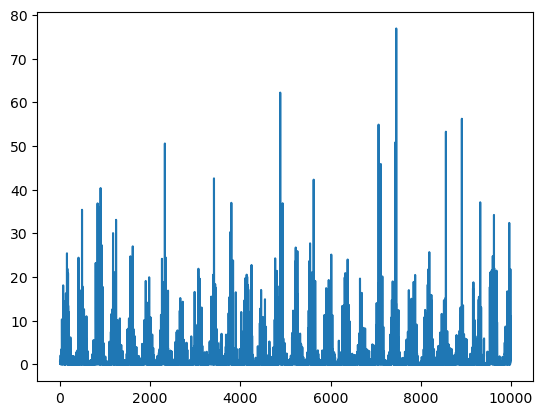

In [ ]:
# print(f"m/s {PRECT_m_s}")
PRECT_mm_d = PRECT_m_s * (10**3) * 3600 * 24
print(f"mm/day {PRECT_mm_d}")

seattle_mm_d = PRECT_mm_d.sel(lat = 49, lon = 123, method = 'nearest')

plt.figure()
plt.plot(seattle_mm_d)

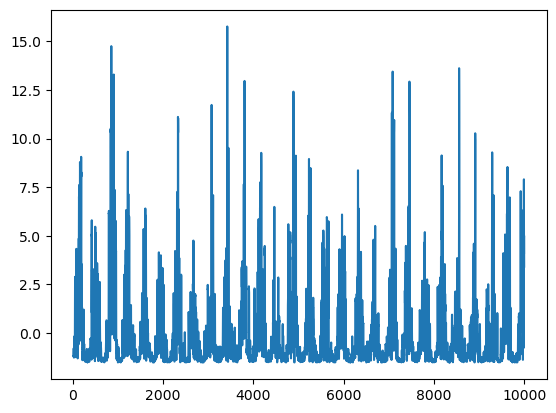

In [ ]:
seattle_mm_d_anom = seattle_mm_d - np.mean(seattle_mm_d)
seattle_mm_d_rolling = seattle_mm_d_anom.rolling(time = 7).mean()
plt.figure()
plt.plot(seattle_mm_d_rolling)

In [ ]:
3600*24
10**3 * 3600 * 24

86400000

In [ ]:
savename = "/Users/C830793391/BIG_DATA/E3SM_Data/presaved/exp006_d_test_SeattleRegional_PRECT_1850-2014.pkl"

with gzip.open(savename, "rb") as obj1:
    val_dat = pickle.load(obj1)
obj1.close()



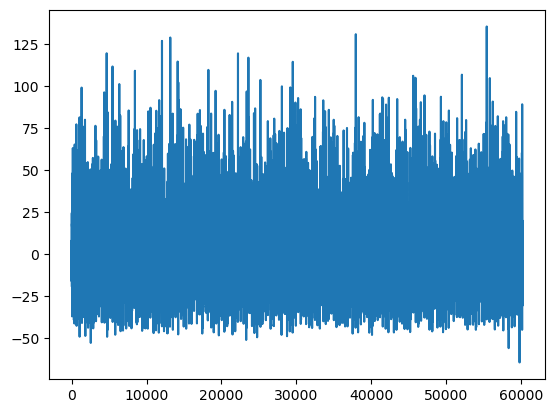

In [ ]:
plt.figure()
plt.plot(val_dat["y"])

In [ ]:
config = utils.get_config("exp006")
seed = config["seed_list"][0]

imp.reload(utils)
imp.reload(filemethods)
imp.reload(data_generator)

data = ClimateData(
    config["databuilder"], 
    expname = config["expname"],
    seed=seed,
    data_dir = config["data_dir"], 
    figure_dir=config["figure_dir"],
    target_only = True, 
    fetch=False,
    verbose=False
)

In [ ]:
d_train, d_val, d_test = data.fetch_data()

Opening .nc files
Opening .nc files
Opening .nc files
Processing training
Processing target output
before incremental adjustment
Target region is a box region. Calculating regional average
removing seasonal cycle
rolling average
lag
completed processing target
Processing validation
Processing target output
before incremental adjustment
Target region is a box region. Calculating regional average
removing seasonal cycle
rolling average
lag
completed processing target
Processing testing
Processing target output
before incremental adjustment
Target region is a box region. Calculating regional average
removing seasonal cycle
rolling average
lag
completed processing target


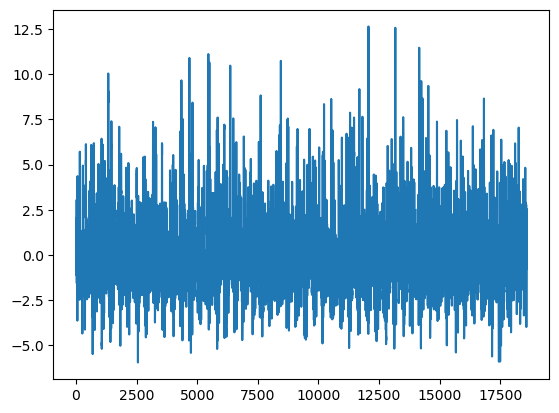

In [ ]:
d_train["y"]
plt.figure()
plt.plot(d_test["y"])

In [ ]:
mjo_filename = "/Users/C830793391/BIG_DATA/E3SM_Data/presaved/MJOarray.leadnans.1850-2014.pkl"

with gzip.open(mjo_filename, "rb") as obj1:
    MJOarray = pickle.load(obj1)
obj1.close()


In [ ]:
MJOarray[120:145, 3, 2]

array([-0.11770853,  0.27926254,  0.1927685 , -0.03238838, -0.29996631,
       -0.3321645 , -0.28373682, -0.15200832, -0.03254344,  0.03816704,
        0.09183547,  0.10217868,  0.08118238,  0.21265218,  0.56105149,
        0.80536103,  0.90774947,  0.88396013,  1.0425688 ,  1.05158186,
        0.79214388,  0.6241079 ,  0.25383815,  0.02444118, -0.2774643 ])

## CRPS -------------------------------------- CRPS

In [ ]:
config = utils.get_config("exp006")
seed = config["seed_list"][0]

front_cutoff = config["databuilder"]["front_cutoff"] # remove front nans : 74 ENSO - two front nans before daily interpolation = 60 days, daily interpolation takes 1/2 the original time step = 15 days TOTAL = ~75
back_cutoff = config["databuilder"]["back_cutoff"]  # remove back nans 


# Open Model Outputs
model_output_pred = '/Users/C830793391/Documents/Research/E3SM/saved/output/exp006_output_pred_testset.pkl'
with gzip.open(model_output_pred, "rb") as obj1:
    output = pickle.load(obj1)

# Open Target Data (test set)
target_file = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp006_test.pkl'
with gzip.open(target_file, "rb") as obj1:
    test_target = pickle.load(obj1)

test_target = test_target["y"][front_cutoff : -back_cutoff]

In [ ]:
output.shape

(60058, 4)

In [ ]:
# sample_vals = np.linspace(1, 59000, 50).astype(int)
# small_output = np.array([output[i, :] for i in sample_vals])
# small_test_target = test_target[sample_vals]

size = 15
small_output = output[20000:20000+size]
small_target = test_target[20000:20000+size]
x_vals = np.arange(.1, .5, 0.00025)

In [ ]:
small_output.shape

(2500, 4)

(16000, 2500)


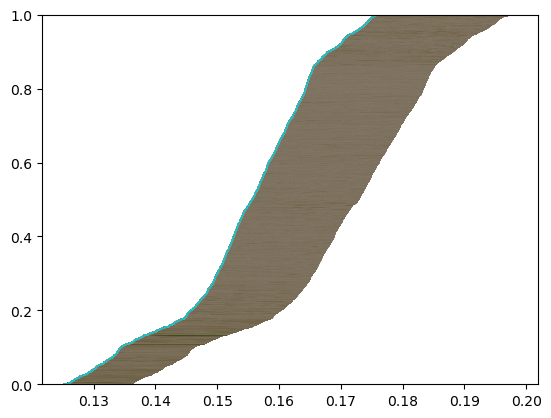

In [ ]:
dist = Shash(small_output)
p = dist.prob(x_vals).numpy()
print(p.shape)

fig = plt.figure()
axs = fig.subplots(1,1)

for distribution in p:
    y = axs.ecdf(distribution, label = "CDF", linewidth = 1)
    # print(distribution.max())
    #axs.axvline(distribution.max(), linestyle = ':', color = 'grey', linewidth = 1)
    #axs.set_xlim([0.14, 0.26])

In [ ]:
p.shape

(16000, 2500)

#### NEW DISTRIBUTION BELOW:

In [ ]:
samples_size = 20000

crps_lower = Shash(output[:size, :]).cdf_NONTENSOR(output[:samples_size,:], test_target[:samples_size]) # area under SHASH CDF up until target value
#print(crps_lower)

dist = Shash(output[:samples_size, :])
p = dist.prob(test_target[:samples_size]).numpy()

maxP = np.zeros(samples_size)
CRPS = np.zeros(samples_size)

for idist, distribution in enumerate(p):
    maxP[idist] = p.max()
            # heaviside - (1- crps_lower) = (x_inf - x) - (1 - crps_lower) = x_delta - (1 - crps_lower)
    crps_upper =  maxP[idist] - (1 - crps_lower[idist]) # area between heaviside function and SHASH CDF 

    CRPS[idist] =  (crps_lower[idist] + crps_upper) ** 2

Climatologial Mean = 0.00018667661056060916
(960, 20000)


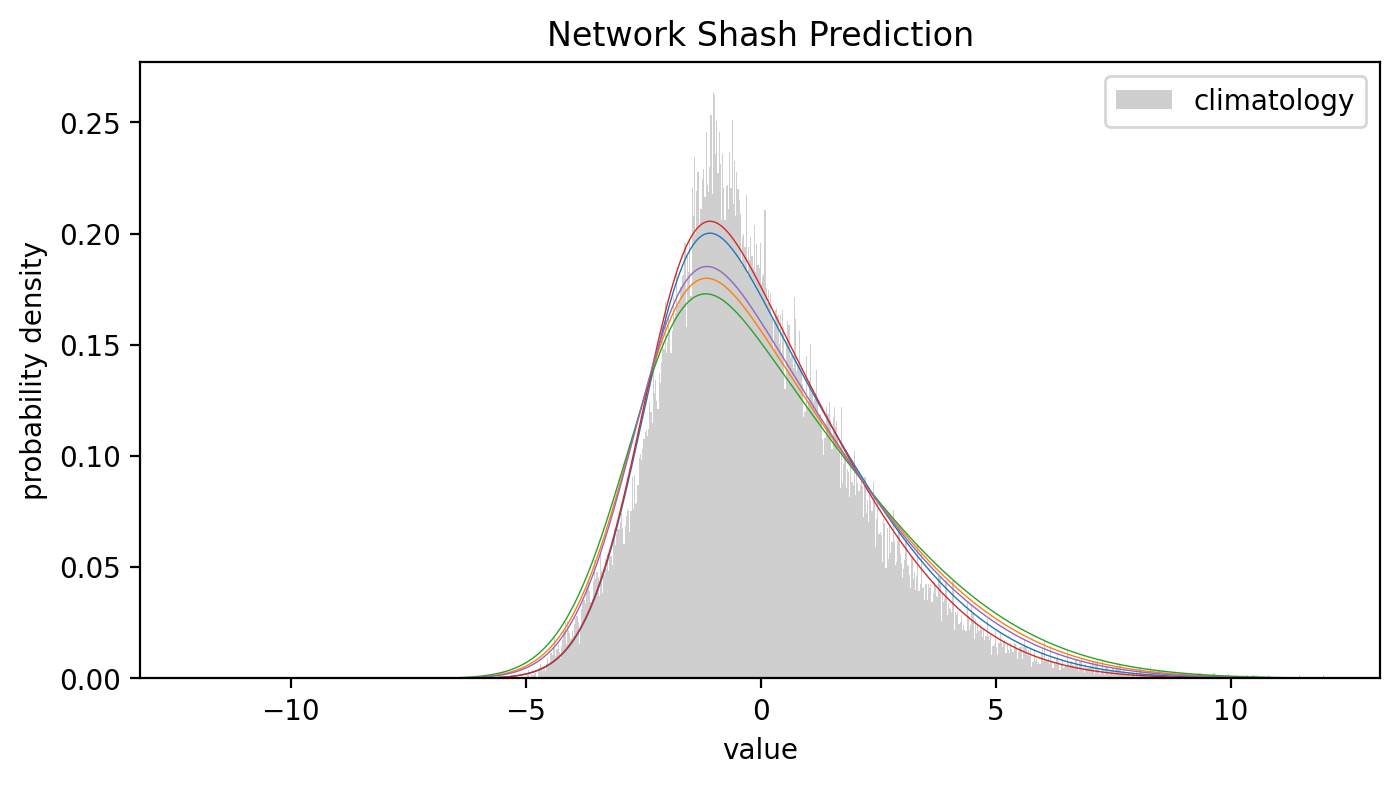

In [ ]:
samples = [18213, 290, 6090, 17, 1998]

# samples = [37, 2052, 12209, 9704, 18046]
#samples = np.linspace(1, 59000, 50).astype(int)

x = np.arange(-12, 12, 0.025)

cfile = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp006_test.pkl'

with gzip.open(cfile, "rb") as obj1:
    data = pickle.load(obj1)
    climatology = data["y"]

print(f"Climatologial Mean = {np.mean(climatology)}")
    
dist = Shash(output[:size,:])
p = dist.prob(x).numpy()

print(p.shape)

plt.figure(figsize=(8, 4), dpi=200)
plt.hist(
    climatology, x, density=True, color="silver", alpha=0.75, label="climatology"
)

plt.plot(x, p[:, samples], linewidth = 0.5 ) #label = samples
plt.xlabel("value")
plt.ylabel("probability density")
plt.title("Network Shash Prediction")
plt.legend()
plt.savefig('/Users/C830793391/Documents/Research/E3SM/visuals/ens3/exp006_50_predictions_w_climatology.png', format='png', bbox_inches ='tight', dpi = 300)
plt.show()

In [ ]:
print(test_target[samples])
print(CRPS[samples])

[ 1.34474912  3.86660336  4.17646555 -0.32000749 -0.21571092]
[0.54383442 1.19083184 1.21084048 0.06565504 0.07659957]


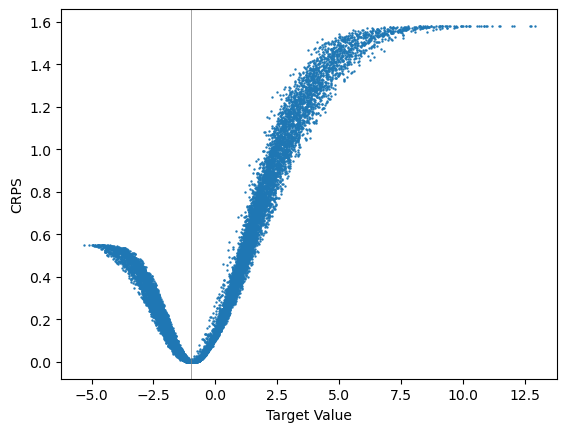

In [ ]:
plt.figure()
plt.scatter(test_target[:size], CRPS, s = 0.5)
plt.xlabel("Target Value")
plt.ylabel("CRPS")
plt.axvline(-1, color  = 'grey', linewidth = 0.5)

shape of cdf_array: (10, 2)


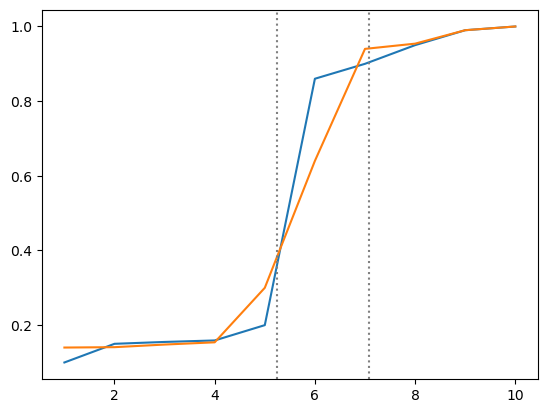

In [ ]:
x_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

truth_values = [5.25, 7.08]

array = np.zeros([10, 2])
fake_cdf1 = np.array([0.1, 0.15, 0.155, 0.159, 0.2, 0.86, 0.9, 0.95, 0.99, 1])
fake_cdf2 = np.array([0.14, 0.141, 0.148, 0.154, 0.3, 0.64, 0.94, 0.954, 0.99, 1])
array[:,0] = fake_cdf1
array[:,1] = fake_cdf2
cdf_array = array

plt.figure()
plt.plot(x_values, cdf_array)
plt.axvline(truth_values[0], color = 'grey', linestyle = ':')
plt.axvline(truth_values[1], color = 'grey', linestyle = ':')

print(f"shape of cdf_array: {np.shape(cdf_array)}")

In [ ]:
config = utils.get_config("exp006")
seed = config["seed_list"][0]
front_cutoff = config["databuilder"]["front_cutoff"] # remove front nans : 74 ENSO - two front nans before daily interpolation = 60 days, daily interpolation takes 1/2 the original time step = 15 days TOTAL = ~75
back_cutoff = config["databuilder"]["back_cutoff"]  # remove back nans 

# Open Model Outputs
model_output_pred = '/Users/C830793391/Documents/Research/E3SM/saved/output/exp006_output_pred_testset.pkl'
with gzip.open(model_output_pred, "rb") as obj1:
    output = pickle.load(obj1)

# Open Target Data (test set)
target_file = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp006_test.pkl'
with gzip.open(target_file, "rb") as obj1:
    test_target = pickle.load(obj1)

test_target = test_target["y"][front_cutoff : -back_cutoff]

(20, 5)
cdf_array shape within CumulativeSum: (20, 5)
cdf_array last row: [1. 1. 1. 1. 1.]


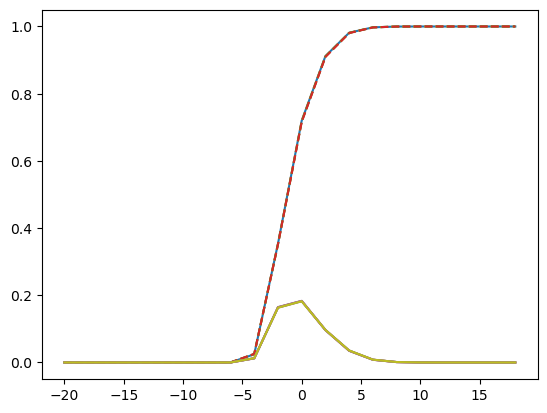

In [ ]:
# Establish SHASH PDF Distributions for All Samples:
x = np.arange(-20, 20, 2)
dist = Shash(output[:5, :])
p = dist.prob(x).numpy()
print(p.shape)

cdf_array = np.cumsum(p, axis=0)
cdf_array = cdf_array / cdf_array[-1, :]
plt.figure()
plt.plot(x, cdf_array[:,0])
plt.plot(x, cdf_array[:,1], '--')   
plt.plot(x, cdf_array[:,2], '--')  
plt.plot(x, cdf_array[:,3], '--')  
plt.plot(x, p)    
print(f"cdf_array shape within CumulativeSum: {cdf_array.shape}")
print(f"cdf_array last row: {cdf_array[-1,:]}")

In [ ]:
# calculate the CDF by taking the cumulative sum of the values in the cdf_array
truth_values = test_target[:5]

# Find the two values of x between which the truth value falls
# Interpolate betwee the two values to find the precise CDF value
calculated_cdf_values = np.zeros(len(truth_values))
for i, truth in enumerate(truth_values):
    x1 = np.where(x <= truth)[0][-1]
    x2 = np.where(x >= truth)[0][0]
    # print(f"x1: {x1}, x2: {x2}")
    cdf1 = cdf_array[x1, i]
    cdf2 = cdf_array[x2, i]
    # print(f"cdf1: {cdf1}, cdf2: {cdf2}")
    cdfs = cdf1 + (cdf2 - cdf1) * (truth - x[x1]) / (x[x2] - x[x1])
    calculated_cdf_values[i] = np.round(cdfs, 6)
    print(f"cdf for sample {i} : {calculated_cdf_values[i]}")

cdf for sample 0 : 0.704958
cdf for sample 1 : 0.593091
cdf for sample 2 : 0.554061
cdf for sample 3 : 0.573164
cdf for sample 4 : 0.5772


In [ ]:
# Calculate bounds for CRPS Calculatoin 

def _discover_bounds(cdf, tol=1e-7):
    """
    Uses scipy's general continuous distribution methods
    which compute the ppf from the cdf, then use the ppf
    to find the lower and upper limits of the distribution.
    """
    class DistFromCDF(stats.distributions.rv_continuous):
        def cdf(self, x):
            return cdf(x)
    dist = DistFromCDF()
    # the ppf is the inverse cdf
    lower = dist.ppf(tol)
    upper = dist.ppf(1. - tol)
    return lower, upper

0.21278354947588765
Total area under the histogram: 1.0


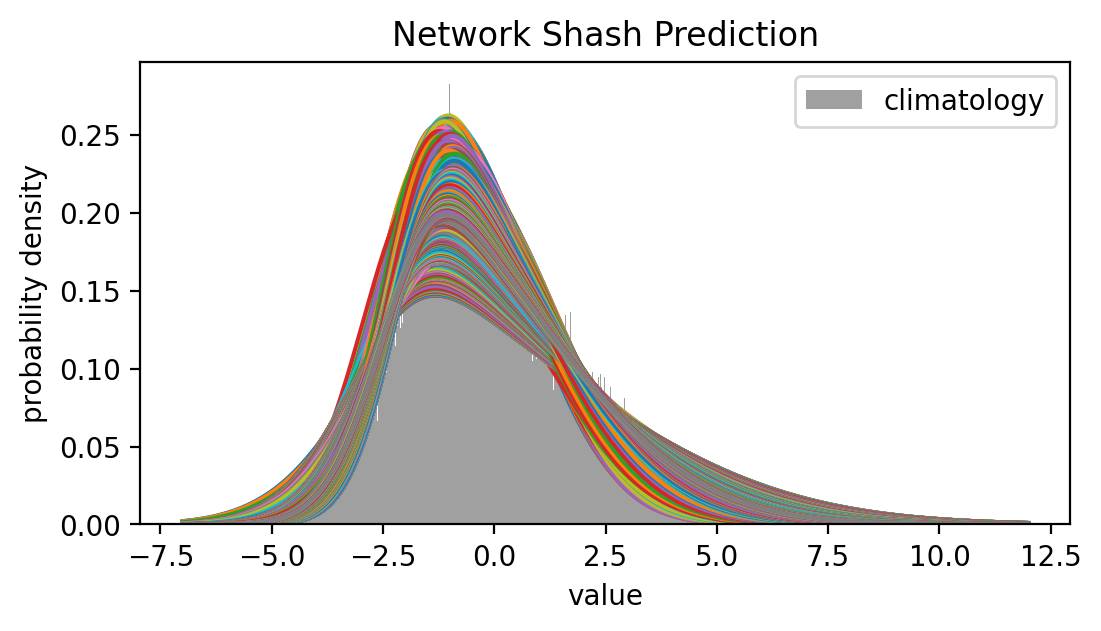

In [ ]:
import shash.shash_torch
from shash.shash_torch import Shash
imp.reload(shash.shash_torch)

output_test = np.array([[0   , 2   , 0.0001,           1. ], 
                  [0    , 2   , 1   ,           1.], 
                  [0    , 2   , -2  ,     1. ]])

climate_data = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp006_test.pkl'

with gzip.open(climate_data, "rb") as obj1:
    data = pickle.load(obj1)
climatology = data["y"]

# bins_inc = 0.025
# bins = np.arange(-10, 10, bins_inc)

plt.figure(figsize=(6, 3), dpi=200)

x = np.arange(-7, 12, 0.01)
dist = Shash(output)
p = dist.prob(x).numpy()

print(np.max(p[:,1]))

counts, bin_edges, __ = plt.hist(
    climatology, x, density=True, color="gray", alpha=0.75, label="climatology"
)
bin_widths = np.diff(bin_edges)
area = np.sum(counts * bin_widths)
print(f'Total area under the histogram: {area}')

plt.plot(x, p)
plt.xlabel("value")
plt.ylabel("probability density")
plt.title("Network Shash Prediction")
plt.legend()
plt.show()

In [ ]:
p_dist_test = Shash(output_test)
p_dist_test = p_dist_test.prob(x).numpy()
plt.plot(p_dist_test)

pdf_test1 = p_dist_test[:,0] / np.sum(p_dist_test[:,0])
pdf_test2 = p_dist_test[:,1] / np.sum(p_dist_test[:,1])
pdf_test3 = p_dist_test[:,2] / np.sum(p_dist_test[:,2])
cdf_test1 = np.cumsum(pdf_test1)
cdf_test2 = np.cumsum(pdf_test2)
cdf_test3 = np.cumsum(pdf_test3)
plt.plot(cdf_test1)
plt.plot(cdf_test2)
plt.plot(cdf_test3)
print(cdf_test1.shape)

In [ ]:
exp002_pickleprocessed = analysis_metrics.load_pickle("/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp002_test.pkl")

In [ ]:
exp002_pickleprocessed["x"].shape

(60211, 3)

In [ ]:

config = utils.get_config("exp007")
seed = config["seed_list"][0]

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.deterministic = True

# ---------------- Data Processing ----------------------------------

# imp.reload(utils)
# imp.reload(filemethods)
# imp.reload(data_generator)

# Instantiate Climate Data class for Global Map input data processing
data = ClimateData(
    config["databuilder"], 
    expname = config["expname"],
    seed=seed,
    data_dir = config["data_dir"], 
    figure_dir=config["figure_dir"],
    target_only = False, 
    fetch=False,
    verbose=False
)

In [ ]:
s_dict_savename1 = str(config["perlmutter_inputs_dir"]) + str(config["expname"]) + '_d_train_1850-1900.nc'
s_dict_savename2 = str(config["perlmutter_inputs_dir"]) + str(config["expname"]) + '_d_val_1850-1900.nc'
s_dict_savename3 = str(config["perlmutter_inputs_dir"]) + str(config["expname"]) + '_d_test_1850-1900.nc'

# Open processed data filess
train_dat = xr.open_dataset(s_dict_savename1)
val_dat = xr.open_dataset(s_dict_savename2)
test_dat = xr.open_dataset(s_dict_savename3)

In [ ]:
training_point1 = train_dat['x'].sel(lat = 10, lon = 10, method = 'nearest').values
training_point2 = train_dat['y'].values

In [ ]:
loss_values = [
    1.42576, 1.42520, 1.42669, 1.42614, 1.42604, 1.42357, 1.42229, 1.42417,
    1.42323, 1.42423, 1.42301, 1.42183, 1.42451, 1.42551, 1.42388, 1.42323,
    1.42042, 1.42138, 1.41951, 1.41804, 1.41818, 1.41747, 1.41696, 1.41711,
    1.41603, 1.41302, 1.41353, 1.41570, 1.41656, 1.41309, 1.41272, 1.41496,
    1.41137, 1.41239, 1.41210, 1.41232, 1.41134, 1.41261, 1.41174, 1.41082,
    1.40899, 1.41021, 1.40755, 1.40829, 1.40696, 1.40708, 1.40876, 1.40602,
    1.40695, 1.40685, 1.40618, 1.40442, 1.40439, 1.40206, 1.40403, 1.40372,
    1.40315, 1.40313, 1.40324, 1.40406, 1.40048, 1.39788, 1.39994, 1.39939,
    1.39971, 1.39998, 1.39752, 1.39435, 1.39564, 1.39627, 1.39626, 1.39886,
    1.39565, 1.39582, 1.39478, 1.39495, 1.39484, 1.39327, 1.39351, 1.39235,
    1.38995, 1.39285, 1.39442, 1.39050, 1.39138, 1.39257, 1.38771, 1.39008,
    1.38781, 1.38821, 1.38762, 1.38910, 1.38696, 1.38631, 1.38829, 1.38600,
    1.38615, 1.38711, 1.38523, 1.38468, 1.38295, 1.38417, 1.38378, 1.38251,
    1.38236, 1.38251, 1.38034, 1.37986, 1.37935, 1.37986, 1.37948, 1.37944,
    1.37656, 1.37753, 1.37774, 1.37493, 1.37822, 1.37606, 1.37559, 1.37537, 1.37244, 1.36987, 1.37055, 1.37061, 1.37265, 1.36906, 1.36833, 1.36925, 1.37014, 1.37036, 
    1.36627, 1.36973, 1.36609, 1.36710, 1.36595, 1.36768, 1.36706, 1.36637, 1.36273, 1.36633, 
    1.36666, 1.36331, 1.36554, 1.36678, 1.36745, 1.36573, 1.36532, 1.36712, 1.36534, 1.36568, 
    1.36513, 1.36588, 1.36319, 1.36572, 1.36374, 1.36604, 1.36356, 1.36489, 1.36498, 1.36463, 
    1.36496, 1.36383, 1.36626, 1.36506, 1.36413, 1.36528, 1.36387, 1.36389, 1.36482, 1.36412
]

val_loss_values = [
    4.09320, 4.07993, 4.02294, 4.06404, 4.07408, 4.10586, 4.03621, 4.10292,
    4.05799, 4.07383, 4.03120, 4.12105, 4.12728, 4.00515, 4.14129, 4.15292,
    4.17509, 4.06990, 4.15841, 4.20783, 4.12098, 4.14213, 4.11413, 4.16789,
    4.22623, 4.11672, 4.05043, 4.11260, 4.07130, 4.07727, 4.17715, 4.13647,
    4.14769, 4.14267, 4.20295, 4.10030, 4.18715, 4.09774, 4.20209, 4.08243,
    4.08653, 4.08729, 4.09469, 4.15220, 4.14646, 4.16512, 4.23703, 4.14525,
    4.27023, 4.09120, 4.15646, 4.15436, 4.20437, 4.26425, 4.20309, 4.22111,
    4.30019, 4.18936, 4.13561, 4.13804, 4.19017, 4.26750, 4.16765, 4.16017,
    4.27295, 4.14749, 4.24140, 4.22549, 4.28053, 4.23757, 4.24294, 4.13848,
    4.21812, 4.18177, 4.25390, 4.17530, 4.19955, 4.22024, 4.30160, 4.23633,
    4.29429, 4.20772, 4.23270, 4.23621, 4.26722, 4.20181, 4.37057, 4.27102,
    4.23971, 4.29975, 4.17253, 4.26290, 4.29030, 4.23620, 4.28964, 4.31930,
    4.21760, 4.27500, 4.30372, 4.34824, 4.32276, 4.30681, 4.19380, 4.29552,
    4.34740, 4.35250, 4.27843, 4.40367, 4.34047, 4.29150, 4.29405, 4.34566,
    4.31970, 4.31048, 4.35329, 4.32003, 4.30177, 4.27680, 4.36646, 4.30584, 4.28976, 4.35295, 4.30972, 4.41776, 4.31809, 4.38519, 4.37728, 4.39378, 4.35673, 4.32380, 
    4.36474, 4.45202, 4.43401, 4.37846, 4.35571, 4.39872, 4.25626, 4.35334, 4.50699, 4.41005, 
    4.35109, 4.42313, 4.39543, 4.40686, 4.34974, 4.32493, 4.38990, 4.43815, 4.41306, 4.45206, 
    4.43591, 4.37465, 4.33367, 4.45872, 4.40962, 4.41858, 4.40371, 4.42810, 4.38729, 4.34295, 
    4.41054, 4.41206, 4.36695, 4.39162, 4.39237, 4.37072, 4.37968, 4.35799, 4.33692, 4.42603
]

train_loss_array = np.array(loss_values)
val_loss_array = np.array(val_loss_values)

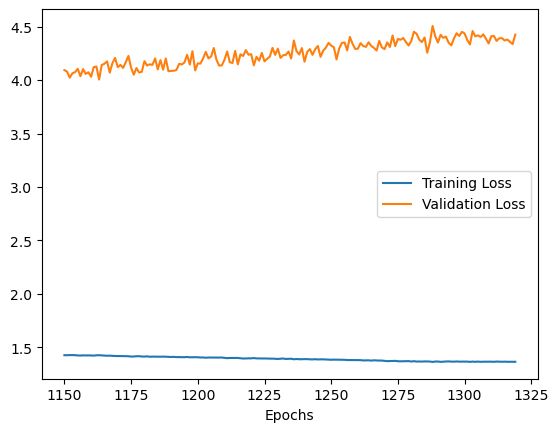

In [ ]:
x = np.arange(1150, 1150 + len(train_loss_array))
plt.figure()
plt.plot(x, train_loss_array, label = "Training Loss")
# plt.figure()
plt.plot(x, val_loss_array, label = "Validation Loss")
plt.xlabel('Epochs')
plt.legend()

In [7]:
fn = "/Users/C830793391/BIG_DATA/E3SM_Data/presaved/ENSO_ne30pg2_HighRes/nino.member0101.daily.nc"
data = xr.open_dataset(fn)
data

<xarray.Dataset> Size: 2MB
Dimensions:  (time: 60195)
Coordinates:
  * time     (time) object 482kB 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
Data variables:
    date     (time) int32 241kB ...
    nino34   (time) float32 241kB ...
    nino12   (time) float32 241kB ...
    nino3    (time) float32 241kB ...
    nino4    (time) float32 241kB ...
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Jun 13 09:53:46 2024: cdo inttime,1850-02-01,00:00:00,1...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

In [4]:
# MJOsavename = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/MJOarray.leadnans.1850-2014.pkl'
MJOsavename = '/pscratch/sd/p/plutzner/E3SM/bigdata/presaved/MJOarray.leadnans.1850-2014.pkl'
with gzip.open(MJOsavename, "rb") as obj:
    MJOarray = pickle.load(obj)
obj.close()

In [6]:
print(MJOarray)

[[[            nan             nan             nan]
  [            nan             nan             nan]
  [            nan             nan             nan]
  ...
  [            nan             nan             nan]
  [            nan             nan             nan]
  [            nan             nan             nan]]

 [[            nan             nan             nan]
  [            nan             nan             nan]
  [            nan             nan             nan]
  ...
  [            nan             nan             nan]
  [            nan             nan             nan]
  [            nan             nan             nan]]

 [[            nan             nan             nan]
  [            nan             nan             nan]
  [            nan             nan             nan]
  ...
  [            nan             nan             nan]
  [            nan             nan             nan]
  [            nan             nan             nan]]

 ...

 [[-8.60319710e+00 -1.17236795e+01

In [4]:
# MJOsavename = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/MJOarray.leadnans.1850-2014.pkl'
MJOsavename = '/pscratch/sd/p/plutzner/E3SM/bigdata/MJO_historical_0101_1850-2014.pkl'
with open(MJOsavename, "rb") as obj:
    MJOarray_original = pickle.load(obj)
obj.close()

In [5]:
MJOarray_original

,PC1,PC2,RMM1,RMM2,Year,Month,Day
0,8.010729,-3.968656,0.736616,-0.373041,1850,5,1
1,10.553949,1.016883,0.970435,0.096769,1850,5,2
2,12.503195,1.565427,1.149646,0.148461,1850,5,3
3,10.650183,2.089575,0.979283,0.197854,1850,5,4
4,8.867485,3.777686,0.815385,0.356932,1850,5,5
...,...,...,...,...,...,...,...
60100,-5.130670,1.963998,-0.471583,0.186020,2014,12,27
60101,-6.345035,2.830888,-0.583230,0.267711,2014,12,28
60102,-8.603197,1.492271,-0.790842,0.141567,2014,12,29
60103,-6.258310,0.680794,-0.575257,0.065098,2014,12,30


In [3]:
import utils
import gzip
import pickle
import numpy as np
from databuilder.data_generator import ClimateData

config = utils.get_config("exp006")
seed = config["seed_list"][0]

data = ClimateData(
    config["databuilder"], 
    expname = config["expname"],
    seed=seed,
    data_dir = config["perlmutter_data_dir"], 
    figure_dir=config["perlmutter_output_dir"],
    target_only = True, 
    fetch=False,
    verbose=False
)

data_file = config["data_loader"]["perlmutter_data_dir"] + "exp006_test_unlagged.pkl"

if data_file.endswith(".pkl"):
        # Open the file using gzip and pickle
        with gzip.open(data_file, "rb") as fp:
            data = pickle.load(fp)
        print(f"Opened pickle file: {data_file}")
elif data_file.endswith(".nc"):
    # Open the file as a NetCDF dataset using xarray
    data = xr.open_dataset(data_file)
    print(f"Opened NetCDF file: {data_file}")
else:
    raise ValueError("Unsupported file extension. Use .pkl or .nc files only.")

Opened pickle file: /pscratch/sd/p/plutzner/E3SM/bigdata/presaved/exp006_test_unlagged.pkl


In [7]:
data_end_x = data["x"][-100:]
data_end_y = data["y"][-100:]

end_cutoff = 47
front_cutoff = 120

In [16]:
# Remove first 120 and last 47 values
trimmed_data = {
    key: value[120:-47] for key, value in data.items()
}

print(trimmed_data["x"].shape)

(60058, 3)


In [9]:
nino0101 = xr.open_dataset('bigdata/presaved/ENSO_ne30pg2_HighRes/nino.member0101.nc')

nino0101.nino34.shape

(1980,)

--------------

In [4]:
import utils
import utils.filemethods as filemethods
from utils import utils
from shash.shash_torch import Shash
import analysis
import analysis.ENSO_indices_calculator
from analysis import analysis_metrics
import analysis.calc_climatology as calc_climatology
import analysis.CRPS as CRPS

# ------------------------------------------------------------------

config = utils.get_config("exp006")
seed = config["seed_list"][0]

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.deterministic = True

lagtime = config["databuilder"]["lagtime"] 
smoothing_length = config["databuilder"]["averaging_length"]  

x_wide = np.arange(-15, 15, 0.01)

# Open Model Outputs
model_output_pred = str(config["perlmutter_output_dir"]) + 'exp006_output_pred_testset_RERUN.pkl'
output = analysis_metrics.load_pickle(model_output_pred)
print(f"output shape: {output.shape}")

# Open Target Data
# target = xr.open_dataset('/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/' + str(config["expname"]) + '_d_test_1850-1900.nc')
target = filemethods.open_data_file(config["perlmutter_data_dir"] + '/presaved/exp006_test_unlagged_28.pkl')
target = target["y"][120:-47]
target = target[lagtime:]
target = target[smoothing_length:]
print(f"target shape: {target.shape}")

# Open Climatology Data: TRAINING DATA
# climatology_filename = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/' + str(config["expname"]) + '_d_train_1850-1900.nc'
climatology_filename = str(config["perlmutter_data_dir"]) + '/presaved/exp006_train_unlagged_28.pkl'
climatology_da = analysis_metrics.load_pickle(climatology_filename)
climatology = climatology_da["y"][120:-47]
climatology = climatology[lagtime:]
climatology = climatology[smoothing_length:]
print(f"climatology shape {climatology.shape}")


output shape: (60037, 4)
Opened pickle file: /pscratch/sd/p/plutzner/E3SM/bigdata//presaved/exp006_test_unlagged_28.pkl
target shape: (60037,)
climatology shape (60037,)


output short : (1000, 4)
target short: (1000,)
climatology_short: (1000,)
Climatological Mean = -0.061248949328662566
Climatological Variance = 4.43359195449027
(2999, 1000)
1000 1000 1000


/pscratch/sd/p/plutzner/E3SM/analysis/CRPS.py:159: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  lhs_int, lhs_tol = integrate.quad(lhs, xmin, target)
/pscratch/sd/p/plutzner/E3SM/analysis/CRPS.py:171: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  o

Shape of all network outputs as PDFs: (3000, 1000)


/pscratch/sd/p/plutzner/E3SM/analysis/CRPS.py:159: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  lhs_int, lhs_tol = integrate.quad(lhs, xmin, target)
/pscratch/sd/p/plutzner/E3SM/analysis/CRPS.py:171: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rhs_int, rhs_tol = integrate.quad(rhs, target, xmax)
/pscratch/sd/p/plutzner/E3SM/analysis/CRPS.py:159: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  lhs_int, lhs_tol = integrate.quad(lhs, xmin, target)
/pscratch/sd/p/plutzner/E3SM/analysis/CRPS.py:159: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The

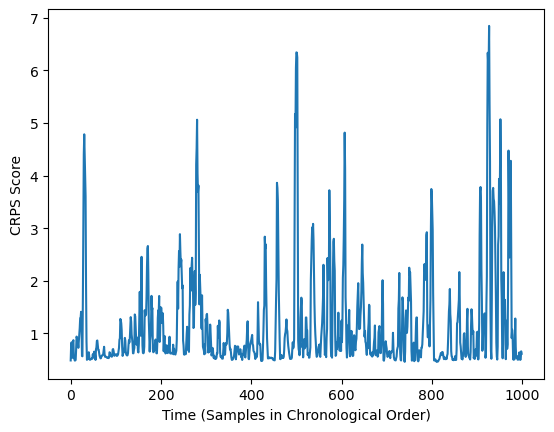

In [25]:
output_short = output[:1000, :]
target_short = target[:1000]
climatology_short = climatology[:1000]

print(f"output short : {output_short.shape}")
print(f"target short: {target_short.shape}")
print(f"climatology_short: {climatology_short.shape}")

# Comput CRPS for climatology
CRPS_climatology = CRPS.calculateCRPS(output_short, target_short, x_wide, config, climatology_short)

# Compute CRPS for all predictions 
CRPS_network = CRPS.calculateCRPS(output_short, target_short, x_wide, config, climatology = None)

Mean CRPS score of model predictions: 1.1577
Mean CRPS score for climatology: 1.1582
Proportion of forecast CRPS scores that are better than climatology: 39.1%


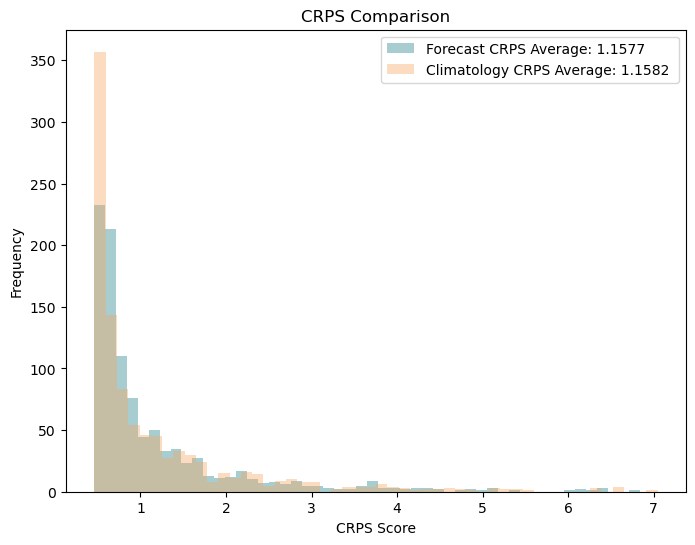

In [26]:
CRPS.CRPScompare(CRPS_network, CRPS_climatology, config)

In [8]:
# Calculate ENSO Indices: 
# monthlyENSO = xr.open_dataset('/Users/C830793391/BIG_DATA/E3SM_Data/presaved/ENSO_ne30pg2_HighRes/nino.member0201.nc')
monthlyENSO = xr.open_dataset(str(config["perlmutter_data_dir"]) + 'presaved/ENSO_ne30pg2_HighRes/nino.member0201.nc')
Nino34 = monthlyENSO.nino34
# select a slice of only certain years
Nino34 = Nino34.sel(time=slice ( str(config["databuilder"]["input_years"][0]) + '-01-01', str(config["databuilder"]["input_years"][1]) + '-12-31'))
Nino34 = Nino34.values

enso_indices_daily = analysis.ENSO_indices_calculator.identify_nino_phases(Nino34, config, threshold=0.4, window=6, lagtime = lagtime, smoothing_length = smoothing_length)

# Find index of the minimum value in each column
min_index = np.argmin(enso_indices_daily, axis=0)

# Print each phase's minimum index
for phase in range(3):
    print(f"Phase {phase}: Minimum index = {min_index[phase]}, minimum value: {enso_indices_daily[min_index[phase], phase]}")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Phase 0: Minimum index = 17321, minimum value: 0
Phase 1: Minimum index = 17009, minimum value: 0
Phase 2: Minimum index = 55492, minimum value: 0


In [4]:
raw_train = xr.open_dataset('/pscratch/sd/p/plutzner/E3SM/bigdata/input_vars.v2.LR.historical_0101.eam.h1.1850-2014.nc')
raw_train.sel(time = '1852-01-01')

<xarray.Dataset> Size: 531kB
Dimensions:    (time: 1, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) object 8B 1852-01-01 00:00:00
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 16B ...
    lon_bnds   (lon, bnds) float64 6kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    PRECT      (time, lat, lon) float32 259kB ...
    TS         (time, lat, lon) float32 259kB ...
Attributes: (12/29)
    CDI:                        Climate Data Interface version 2.3.0 (https:/...
    Conventions:                CF-1.7
    source:                     E3SM Atmosphere Model
    institution:                LLNL (Lawrence Livermore National Laboratory,...
    ne:                         30
    fv_nphys:                   2
    ...                         ...
    remap_hostname:             login27
    remap_version:              5.1.4
    nco_openmp_thread_number:   2
    map_file:                   /global/homes/p/plma/work/climo/maps/map_ne30...
    input_file:                 /pscratch/sd/p/plma/DECK/member1/native/v2.LR...
    CDO:                        Climate Data Operators version 2.3.0 (https:/...

In [6]:
raw_train.PRECT.sel(time = '1850-01-01')

<xarray.DataArray 'PRECT' (time: 58340, lat: 180, lon: 360)> Size: 15GB
[3780432000 values with dtype=float32]
Coordinates:
  * time     (time) object 467kB 1850-01-01 00:00:00 ... 1850-01-01 00:00:00
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:     Total (convective and large-scale) precipitation rate (liq...
    units:         m/s
    cell_methods:  time: mean

In [8]:
# Check 1850-01-01 data from BlueberryPie files: 

# load original input vars netcdf: 
raw_train_local = xr.open_dataset('/Users/C830793391/BIG_DATA/E3SM_Data/ens1/input_vars.v2.LR.historical_0101.eam.h1.1850-2014.nc')
raw_val_local = xr.open_dataset('/Users/C830793391/BIG_DATA/E3SM_Data/ens2/input_vars.v2.LR.historical_0151.eam.h1.1850-2014.nc')
raw_test_local = xr.open_dataset('/Users/C830793391/BIG_DATA/E3SM_Data/ens3/input_vars.v2.LR.historical_0201.eam.h1.1850-2014.nc')

# load copy of input vars netcdf in BlueberryPie hardcopy directory:
hardcopy_dir = '/Users/C830793391/BIG_DATA/E3SM_Data/Hardcopies/12-12-2024BlueberryPieHardcopy/'
raw_train_copy = xr.open_dataset(str(hardcopy_dir) + 'bigdata/input_vars.v2.LR.historical_0101.eam.h1.1850-2014.nc')
raw_val_copy = xr.open_dataset(str(hardcopy_dir) + 'bigdata/input_vars.v2.LR.historical_0151.eam.h1.1850-2014.nc')
raw_test_copy = xr.open_dataset(str(hardcopy_dir) + 'bigdata/input_vars.v2.LR.historical_0201.eam.h1.1850-2014.nc')

In [ ]:
raw_train_local.sel(time = '1850-01-01')
raw_val_local.sel(time = '1850-01-01')
raw_test_local.sel(time = '1850-01-01')

raw_train_copy.sel(time = '1850-01-01')
raw_val_copy.sel(time = '1850-01-01')
raw_test_copy.sel(time = '1850-01-01')

# ALL LOOK GOOD!!!

<xarray.Dataset> Size: 531kB
Dimensions:    (time: 1, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) object 8B 1850-01-01 00:00:00
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 16B ...
    lon_bnds   (lon, bnds) float64 6kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    PRECT      (time, lat, lon) float32 259kB ...
    TS         (time, lat, lon) float32 259kB ...
Attributes: (12/29)
    CDI:                        Climate Data Interface version 2.3.0 (https:/...
    Conventions:                CF-1.7
    source:                     E3SM Atmosphere Model
    institution:                LLNL (Lawrence Livermore National Laboratory,...
    ne:                         30
    fv_nphys:                   2
    ...                         ...
    remap_hostname:             login25
    remap_version:              5.1.4
    nco_openmp_thread_number:   2
    map_file:                   /global/homes/p/plma/work/climo/maps/map_ne30...
    input_file:                 /pscratch/sd/p/plma/DECK/member3/native/v2.LR...
    CDO:                        Climate Data Operators version 2.3.0 (https:/...

In [3]:
# Check 1850-01-01 data from Perlmutter files: 
raw_train_pm = xr.open_dataset('/pscratch/sd/p/plutzner/E3SM/bigdata/input_vars.v2.LR.historical_0101.eam.h1.1850-2014.nc')
raw_val_pm = xr.open_dataset('/pscratch/sd/p/plutzner/E3SM/bigdata/input_vars.v2.LR.historical_0151.eam.h1.1850-2014.nc')
raw_test_pm = xr.open_dataset('/pscratch/sd/p/plutzner/E3SM/bigdata/input_vars.v2.LR.historical_0201.eam.h1.1850-2014.nc')

In [7]:
raw_train_pm.sel(time = '1850-01-01')
raw_val_pm.sel(time = '1850-01-01')
raw_test_pm.sel(time = '1850-01-01')

<xarray.Dataset> Size: 26GB
Dimensions:    (time: 49385, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) object 395kB 1850-01-01 00:00:00 ... 1850-01-01 00:00:00
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 790kB ...
    lon_bnds   (lon, bnds) float64 6kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    PRECT      (time, lat, lon) float32 13GB ...
    TS         (time, lat, lon) float32 13GB ...
Attributes: (12/29)
    CDI:                        Climate Data Interface version 2.3.0 (https:/...
    Conventions:                CF-1.7
    source:                     E3SM Atmosphere Model
    institution:                LLNL (Lawrence Livermore National Laboratory,...
    ne:                         30
    fv_nphys:                   2
    ...                         ...
    remap_hostname:             login25
    remap_version:              5.1.4
    nco_openmp_thread_number:   2
    map_file:                   /global/homes/p/plma/work/climo/maps/map_ne30...
    input_file:                 /pscratch/sd/p/plma/DECK/member3/native/v2.LR...
    CDO:                        Climate Data Operators version 2.3.0 (https:/...